In [16]:
# prompt: import relevant packages for clustering  kmeans pca

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
import seaborn as sns

In [17]:
# load the dataset
f=pd.read_csv('/content/Country-data.csv')

In [18]:
# show the the first 5 rows of data set
df.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [19]:
# show the data set information such as number of null data and features type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [20]:
# drop the useless feature for clustering
df_drop = df.drop(columns=['country'])

<Axes: >

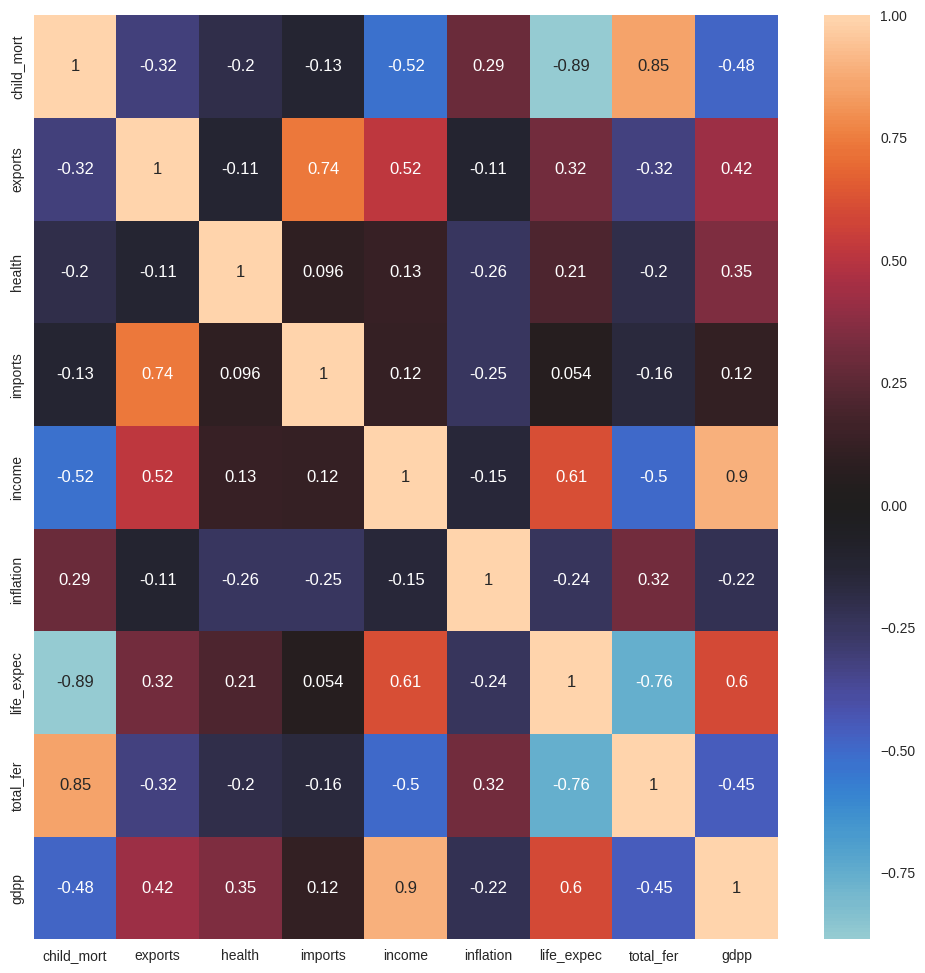

In [21]:
# correlation matrix of dataset
cor_mat= df_drop.corr()
plt.figure(figsize=(12,12))
sns.heatmap(cor_mat,annot=True, center=0)

In [22]:
# implement the PCA to reduce features into 2 components
PCA_2=PCA(n_components=2)
PCA_2_df=PCA_2.fit_transform(df_drop)

In [23]:
PCA_2_df=pd.DataFrame(PCA_2_df)
PCA_2_df=PCA_2_df.rename(columns={0:'PC1',1:'PC2'})

In [24]:
PCA_2_df.head()

,PC1,PC2
0,-19815.128018,-1651.124720
1,-11338.938992,1493.469028
2,-8926.352589,3264.684102
3,-14652.465937,-867.795270
4,896.142032,1898.478151


In [25]:
PCA_2_df.shape


(167, 2)

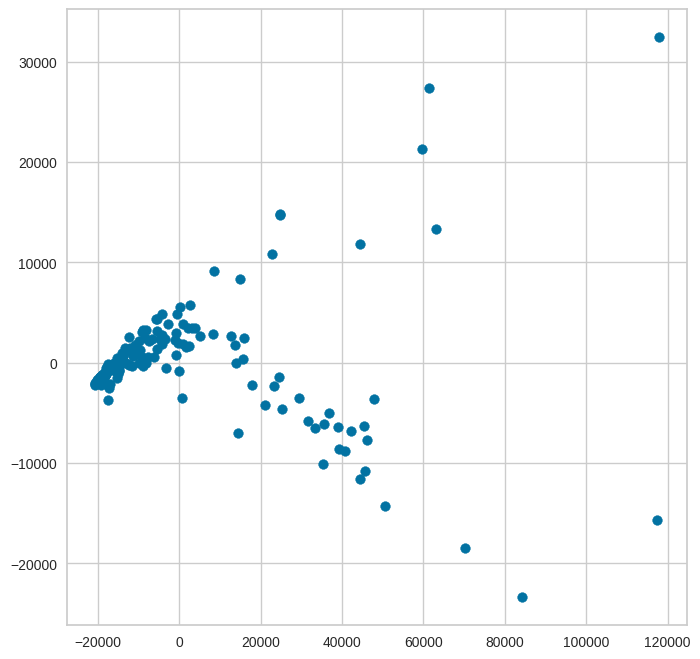

In [27]:
#plot the data points for reduced feature data set
fig=plt.figure(figsize=(8,8))
plt.scatter(PCA_2_df['PC1'],PCA_2_df['PC2'])


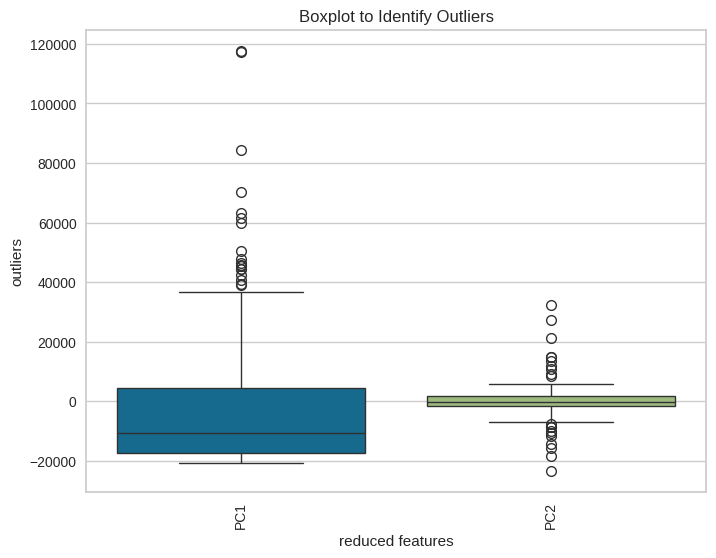

In [28]:

# Create a boxplot to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=PCA_2_df)
plt.xticks(rotation=90)
plt.xlabel('reduced features')
plt.ylabel('outliers')
plt.title("Boxplot to Identify Outliers")
plt.show()


In [29]:

# Calculate the IQR for each column
Q1 = PCA_2_df.quantile(0.15)
Q3 = PCA_2_df.quantile(0.85)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
filtered_df = PCA_2_df[~((PCA_2_df < lower_bound) | (PCA_2_df > upper_bound)).any(axis=1)]

# Print the shape of the original and filtered DataFrames
print("Original DataFrame shape:", PCA_2_df.shape)
print("Filtered DataFrame shape:", filtered_df.shape)


Original DataFrame shape: (167, 2)
Filtered DataFrame shape: (154, 2)


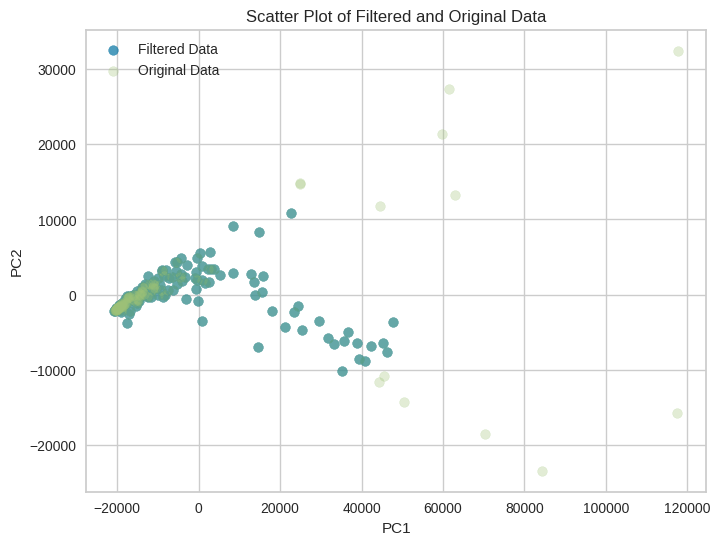

In [30]:

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot the filtered DataFrame
ax.scatter(filtered_df.iloc[:, 0], filtered_df.iloc[:, 1], label='Filtered Data', alpha=0.7)

# Scatter plot the original PCA_2_df
ax.scatter(PCA_2_df.iloc[:, 0], PCA_2_df.iloc[:, 1], label='Original Data', alpha=0.3)

# Set labels and title
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Scatter Plot of Filtered and Original Data')

# Add a legend
ax.legend()

# Display the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

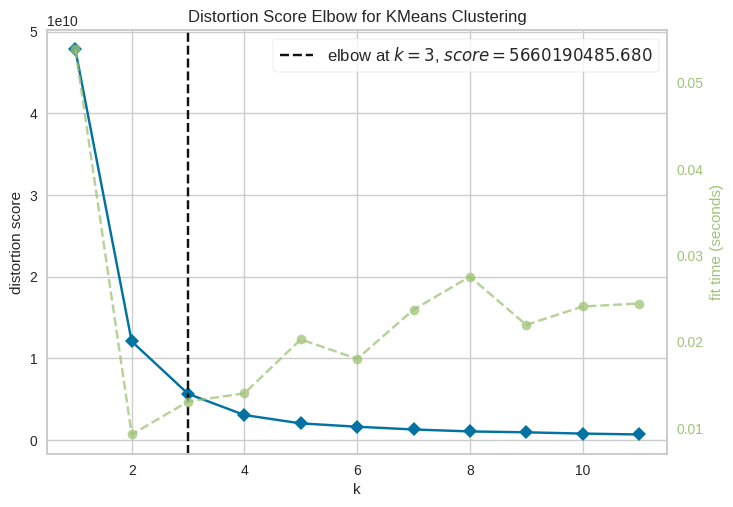

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:


# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

# Fit the visualizer to the filtered data
visualizer.fit(filtered_df)

# Display the elbow plot
visualizer.show()


In [35]:

# Instantiate KMeans with k=3
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model to the filtered data
kmeans.fit(filtered_df)

# Get cluster assignments for each data point
cluster_assignments = kmeans.labels_
# get the location of cluster centroids
centroids = kmeans.cluster_centers_
# Add cluster assignments to the filtered DataFrame
filtered_df['Cluster'] = cluster_assignments




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-35-01e20cf813e4>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Cluster'] = cluster_assignments


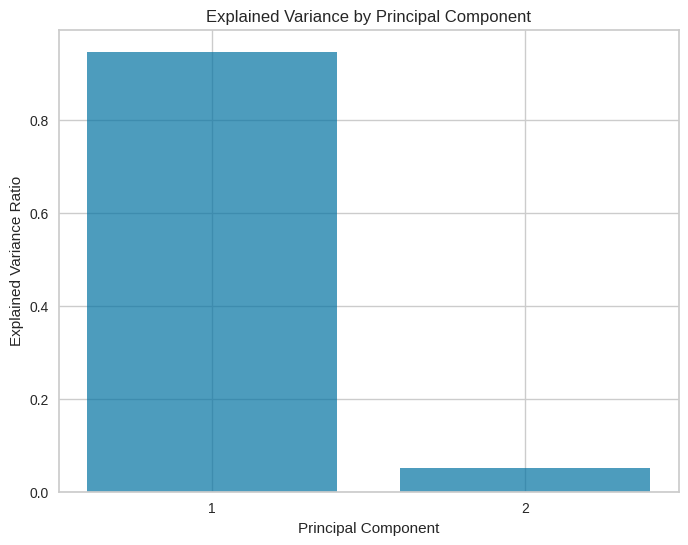

Explained Variance for PC1: 0.95
Explained Variance for PC2: 0.05


In [34]:

# Calculate explained variance for each principal component
explained_variance = PCA_2.explained_variance_ratio_

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Component')
plt.xticks(range(1, len(explained_variance) + 1))
plt.show()

# Print the explained variance for each component
for i, variance in enumerate(explained_variance):
  print(f"Explained Variance for PC{i+1}: {variance:.2f}")


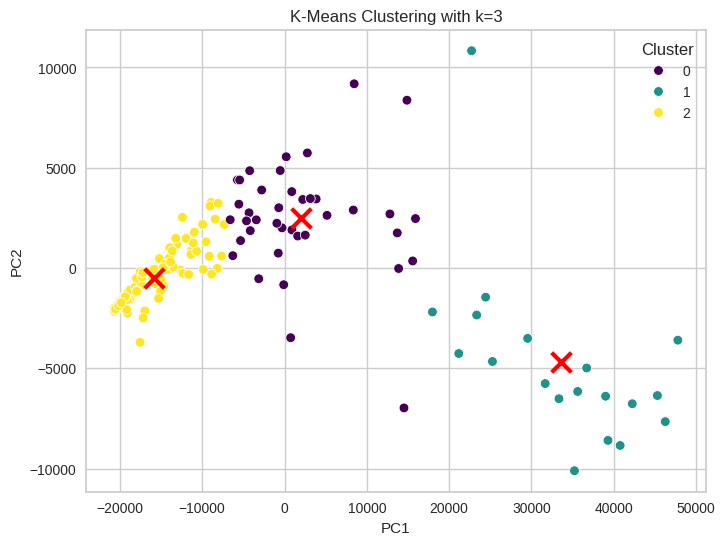

In [36]:
# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=filtered_df.iloc[:, 0], y=filtered_df.iloc[:, 1], hue=filtered_df['Cluster'], palette='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='red', label='Centroids')
plt.title('K-Means Clustering with k=3')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()